In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integral

# I. Probability
## 1. $\mathscr{L}^1\left(\mathbb{R}\right)$ space
This space is the vector space of Lebesgue Integrable functions with respect to the Lebesgue mesure with the norm $\lVert \cdot \rVert=\int_{\mathbb{R}}\lvert \cdot \rvert d\mu$
## 2. Probability Distribution Function
A probability distribution function is any non-negative Lebesgue Integrable function with unit norm.

In other words, $f$ is said to be a PDF if 
$$\begin{cases}
f\in \mathscr{L}^1\left(\mathbb{R},\mathbb{R}\right)\\
\int_{\mathbb{R}}\lvert f \rvert d\mu = 1 \\
\forall x \in \mathbb{R}, \quad f(x)\ge 0
\end{cases}$$

## 3. Random Variable
1. a random variable $X$ is any function from a probability triplet to a mesurable space
2. a continous random variable is a random variable with an uncountable image 
3. an absolutely continuous random variable ??

We will only consider absolutely continuous random variables, because they have a correspending PDF

## 4. Distribution Parameters
Let $X$ be a random variable with PDF $f$
1. The mean of $X$ is defined as:
$$\mathbb{E}\left[X\right]\triangleq \int_{\mathbb{R}}xf d\mu \quad \text{ if it exists and is finite}$$
2. The variance of $X$ is defined as:
$$\mathbb{V}\left[X\right]\triangleq \mathbb{E}\left[\left(X-\mathbb{E}\left[X\right]\right)^2\right] \quad \text{ if it exists and is finite}$$
3. The standard deviation of $X$ is defined as:
$$ \sigma_X\triangleq\sqrt{\mathbb{V}\left[X\right]} $$
4. For $k\in\mathbb{N},$ We define the moments $\mu_k$ as: 
$$ \mu_k\left(X\right)\triangleq\mathbb{E}\left[X^k\right] \quad \text{ if it exists and is finite}$$

# II. Estimating Distribution Parameters

## 1. Estimator
Let $\Phi$
1. an estimator is any function $\hat{\Phi}$ that assigns to a random variable $X$ another random variable $\hat{\Phi}(X)$
2. an estimator $\hat{\Phi}$ of $\Phi$ is said to be unbiased if $X\rightarrow \mathbb{E}\left[\Phi(X)\right]$ is a constant function equal to $\Phi$

## 2. Sample from a random variable
1. Let $X$ be a random variable with a pdf $f$ with a mean $\mu$ and standard deviation $\sigma$
2. We will randomly (how?) pick $n$ observations

Let $\boldsymbol{X}=\left(X_i\right)_{i\in\{1,\dots,n\}}$ be the vector of random observations that are idenpendant and identically distributed

$\boldsymbol{X}$ itself is a random variable

## 3. Estimating mean
Let $\hat{\mu}\left(\boldsymbol{X}\right)=\frac{1}{n}\sum_{i=1}^n X_i$ be the sample mean

$\hat{\mu}$ is an estimator of $\mu$
$$\begin{align}
\mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)\right]&=\mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n X_i\right] \\
&= \frac{1}{n} \sum_{i=1}^n \mathbb{E}\left[X_i\right] \\
&= \frac{1}{n} \sum_{i=1}^n \mu \\
&= \mu
\end{align}$$
We can conclude that the sample mean is an unbiased estimator of the mean

We will calculate the expected estimation error:
$$ \begin{align}
\mathbb{E}\left[\left(\hat{\mu}\left(\boldsymbol{X}\right)-\mu\right)^2\right] 
&= \mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right]-2\mathbb{E}\left[\hat{\mu}(\boldsymbol{X})\mu\right]+\mathbb{E}\left[\mu^2\right]
\\
&= \mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right]-2\mu\mathbb{E}\left[\hat{\mu}(\boldsymbol{X})\right]+\mu^2\\
&= \frac{1}{n^2}\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j\right]-2\mu^2+\mu^2\\
&= \frac{1}{n^2}\sum_{i=1}^n\mathbb{E}\left[X_i^2\right]+\frac{1}{n^2}\sum_{i,j=1\\ i\neq j}^n\mathbb{E}\left[X_iX_j\right]-\mu^2\\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{1}{n^2}\sum_{i,j=1\\ i\neq j}^n\mathbb{E}\left[X_i\right]\mathbb{E}\left[X_j\right]-\mu^2 \\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{1}{n^2}\sum_{i,j=1\\ i\neq j}^n\mathbb{E}\left[X\right]\mathbb{E}\left[X\right]-\mu^2 \\
&=  \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{1}{n^2}\sum_{i,j=1\\ i\neq j}^n\mathbb{E}\left[X\right]^2-\mu^2 \\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{n-1}{n}\mathbb{E}\left[X\right]^2-\mu^2 \\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]+\frac{n-1}{n}\mu^2-\mu^2\\
&= \frac{1}{n}\mathbb{E}\left[X^2\right]-\frac{1}{n}\mu^2\\
&= \frac{1}{n}\left(\mathbb{E}\left[X^2\right]-\mu^2\right)\\
&= \frac{\sigma^2}{n}
\end{align} $$
## 4. Estimating Variance
Let $\hat{\sigma^2}\left(\boldsymbol{X}\right)=\frac{1}{n}\sum_{i=1}^n \left(X_i-\hat{\mu}\left(\boldsymbol{X}\right)\right)^2$ be the sample (naive) variance
$$\begin{align}
\mathbb{E}\left[\hat{\sigma^2}\left(\boldsymbol{X}\right)\right]&=\mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n \left(X_i-\hat{\mu}\left(\boldsymbol{X}\right)\right)^2\right] \\
&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[\left(X_i-\hat{\mu}\left(\boldsymbol{X}\right)\right)^2\right] \\
&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[X_i^2-2X_i\hat{\mu}\left(\boldsymbol{X}\right)+\hat{\mu}\left(\boldsymbol{X}\right)^2\right] \\
&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[X_i^2\right]-2\mathbb{E}\left[X_i\hat{\mu}\left(\boldsymbol{X}\right)\right]+\mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right] \\
&=  \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[X_i^2\right]- \frac{2}{n}\sum_{i=1}^n \mathbb{E}\left[X_i\hat{\mu}\left(\boldsymbol{X}\right)\right]+ \frac{1}{n}\sum_{i=1}^n \mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{2}{n}\sum_{i=1}^n \mathbb{E}\left[\frac{1}{n}X_i\sum_{j=1}^nX_j\right]+
 \mathbb{E}\left[\hat{\mu}\left(\boldsymbol{X}\right)^2\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{2}{n^2}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}\left[X_iX_j\right]+
 \mathbb{E}\left[\frac{1}{n^2}\left(\sum_{i=1}^n X_i\right)^2\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{2}{n^2}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}\left[X_iX_j\right]+
 \mathbb{E}\left[\frac{1}{n^2}\sum_{i=1}^n \sum_{j=1}^n X_iX_j\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{2}{n^2}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}\left[X_iX_j\right]+
\frac{1}{n^2}\sum_{i=1}^n \sum_{j=1}^n \mathbb{E}\left[X_iX_j\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{1}{n^2}\sum_{i=1}^n\sum_{j=1}^n \mathbb{E}\left[X_iX_j\right]\\
&= \mathbb{E}\left[X^2\right]- \frac{1}{n^2}\sum_{i=1}^n \mathbb{E}\left[X_i^2\right]- \frac{1}{n^2}\sum_{i,j=1 \\ i\neq j}^n \mathbb{E}\left[X_iX_j\right] \\
&= \mathbb{E}\left[X^2\right]- \frac{1}{n^2}\sum_{i=1}^n \mathbb{E}\left[X_i^2\right]- \frac{1}{n^2}\sum_{i,j=1 \\ i\neq j}^n \mathbb{E}\left[X_i\right]\mathbb{E}\left[X_j\right] \\
&= \mathbb{E}\left[X^2\right]- \frac{1}{n^2}\sum_{i=1}^n \mathbb{E}\left[X^2\right]- \frac{1}{n^2}\sum_{i,j=1 \\ i\neq j}^n \mathbb{E}\left[X\right]\mathbb{E}\left[X\right] \\
&= \mathbb{E}\left[X^2\right] - \frac{n}{n^2} \mathbb{E}\left[X^2\right] - \frac{n(n-1)}{n^2}\mathbb{E}\left[X\right]^2\\
&= \frac{n-1}{n}\mathbb{E}\left[X^2\right]-\frac{n-1}{n}\mathbb{E}\left[X\right]^2 \\
&= \frac{n-1}{n}\left(\mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2\right) \\
&= \frac{n-1}{n}\sigma^2 \\
\implies \frac{n}{n-1}\hat{\sigma^2}(\boldsymbol{X}) &=\sigma^2
\end{align}$$
So we have for $n>1,\quad\hat{\sigma_*^2}(\boldsymbol{X})=\frac{n}{n-1}\hat{\sigma^2}(\boldsymbol{X})=\frac{1}{n-1}\sum_{i=1}^n\left(X_i-\hat{\mu}(\boldsymbol{X})\right)^2$ is an unbiased estimator of $\sigma^2$
We will call it the sample variance

## 5.Variance of Sample Variance
We will use the following identities 
$$\begin{align}
\sum_{i=1}^n\mathbb{E}\left[X_i^4\right]&=n\mu_4 \\
\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]&=n\mu_4+n(n-1)\mu_2^2 \\
\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right]&=n\mu_4+2n(n-1)\mu_3\mu_1+n(n-1)\mu_2^2+n(n-1)(n-2)\mu_1^2\mu_2 \\
\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]&=n\mu_4+4n(n-1)\mu_3\mu_1+3n(n-1)\mu_2^2+6n(n-1)(n-2)\mu_2\mu_1^2+n(n-1)(n-2)(n-3)\mu_1^4  \\
\mathbb{E}\left[\left(X-\mu\right)^4\right] &= \kappa \\
&= \mu_4-4\mu_1\mu_3-3\sigma^4+3\mu_2^2
\end{align}$$
We will note $\hat{\mu}=\hat{\mu}(\boldsymbol{X}),$We have:
$$
\begin{align}
\mathbb{E}\left[\left(\hat{\sigma_*^2}(\boldsymbol{X})-\sigma^2\right)^2\right]&= \mathbb{E}\left[\hat{\sigma_*^2}(\boldsymbol{X})^2\right]-\mathbb{E}\left[\hat{\sigma_*^2}(\boldsymbol{X})\right]^2 \\
&= \mathbb{E}\left[\left(\hat{\sigma_*^2}(\boldsymbol{X})-\sigma^2\right)^2\right] \\
&= \mathbb{E}\left[\hat{\sigma_*^2}(\boldsymbol{X})^2\right]-\sigma^4 \\
&= \frac{1}{(n-1)^2}\sum_{i,j=1}^n\mathbb{E}\left[\left(X_i-\hat{\mu}(\boldsymbol{X})\right)^2\left(X_j-\hat{\mu}(\boldsymbol{X})\right)^2\right]-\sigma^4 \\
&= \frac{1}{(n-1)^2}\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2  -  2X_i^2X_j\hat{\mu}   +   X_i^2\hat{\mu}^2   -   2X_iX_j^2\hat{\mu}  +4X_iX_j\hat{\mu}^2   - 2X_iX_j\hat{\mu}^3 + X_j^2\hat{\mu}^2 - 2X_j\hat{\mu}^3  +\hat{\mu}^4\right]-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  2\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j\hat{\mu}\right]   +   \sum_{i,j=1}^n\mathbb{E}\left[X_i^2\hat{\mu}^2\right]   -   2\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j^2\hat{\mu}\right]  +4\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j\hat{\mu}^2\right]\right)   + \\
& \frac{1}{(n-1)^2}\left(-2\sum_{i,j=1}^n\mathbb{E}\left[X_i\hat{\mu}^3\right] + \sum_{i,j=1}^n\mathbb{E}\left[X_j^2\hat{\mu}^2\right] - 2\sum_{i,j=1}^n\mathbb{E}\left[X_j\hat{\mu}^3\right]  +\sum_{i,j=1}^n\mathbb{E}\left[\hat{\mu}^4\right]\right)-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  2\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j\hat{\mu}\right]   +   n\sum_{i=1}^n\mathbb{E}\left[X_i^2\hat{\mu}^2\right]   -   2\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j^2\hat{\mu}\right]  +4\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j\hat{\mu}^2\right]\right)   + \\
& \frac{1}{(n-1)^2}\left(-2n\sum_{i=1}^n\mathbb{E}\left[X_i\hat{\mu}^3\right] + n\sum_{j=1}^n\mathbb{E}\left[X_j^2\hat{\mu}^2\right] - 2n\sum_{j=1}^n\mathbb{E}\left[X_j\hat{\mu}^3\right] +n^2\mathbb{E}\left[\hat{\mu}^4\right]\right)-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  4\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j\hat{\mu}\right]   +   2n\sum_{i=1}^n\mathbb{E}\left[X_i^2\hat{\mu}^2\right]   -   4n\sum_{i,j=1}^n\mathbb{E}\left[X_i\hat{\mu}^3\right]  +4\sum_{i,j=1}^n\mathbb{E}\left[X_iX_j\hat{\mu}^2\right] + n^2\mathbb{E}\left[\hat{\mu}^4\right]\right)-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  \frac{4}{n}\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right]   +   \frac{2}{n}\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right] \right)  + \\
& \frac{1}{(n-1)^2}  \left(- \frac{4}{n^2}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]  +\frac{4}{n^2}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right] + \frac{1}{n^2}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]\right)-\sigma^4 \\
&= \frac{1}{(n-1)^2}\left(\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  -  \frac{2}{n}\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right] + \frac{1}{n^2}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]\right)-\sigma^4 \\
&= \frac{1}{n(n-1)^2}\left(n\sum_{i,j=1}^n\mathbb{E}\left[X_i^2X_j^2\right]  - 2\sum_{i,j,k=1}^n\mathbb{E}\left[X_i^2X_jX_k\right] + \frac{1}{n}\sum_{i,j,k,q=1}^n\mathbb{E}\left[X_iX_jX_kX_q\right]\right)-\sigma^4 \\
&= \frac{1}{n(n-1)^2}\left(n^2\mu_4+n^2(n-1)\mu_2^2  - 2n\mu_4-4n(n-1)\mu_3\mu_1-2n(n-1)\mu_2^2-2n(n-1)(n-2)\mu_1^2\mu_2 \right)\\
& + \frac{1}{n(n-1)^2}\left(\mu_4+4(n-1)\mu_3\mu_1+3(n-1)\mu_2^2+6(n-1)(n-2)\mu_2\mu_1^2+(n-1)(n-2)(n-3)\mu_1^4 \right)-\sigma^4\\
&= \frac{1}{n(n-1)^2}\Bigg((n-1)^2\mu_4+(n-1)\Big(\left(n-2\right)\left(n-3\right)+3n-3\Big)\mu_2^2-2(n-1)(n-2)(n-3)\mu_1^2\mu_2+(n-1)(n-2)(n-3)\mu_1^4-4(n-1)^2\mu_1\mu_3\Bigg)-\sigma^4 \\
&= \frac{1}{n(n-1)^2}\left((n-1)^2\mu_4+3(n-1)^2\mu_2^2+(n-1)(n-2)(n-3)(\mu_2^2-2\mu_1^2\mu_2+\mu_1^4)-4(n-1)^2\mu_1\mu_3\right)-\sigma^4 \\
&= \frac{1}{n(n-1)^2}\left((n-1)^2\mu_4+3(n-1)^2\mu_2^2+(n-1)\left((n-2)(n-3)-n(n-1)\right)\sigma^4-4(n-1)^2\mu_1\mu_3\right) \\
&= \frac{1}{n(n-1)}\left((n-1)\mu_4+3(n-1)\mu_2^2-2(2n-3)\sigma^4-4(n-1)\mu_1\mu_3\right) \\
&= \frac{1}{n(n-1)}\bigg(\big(n-1\big)\big(\mu_4+3\mu_2^2-4\mu_1\mu_3\big)-2(2n-3)\sigma^4\bigg)\\
&= \frac{1}{n(n-1)}\bigg(\big(n-1\big)\big(\kappa + 3\sigma^4\big)-2(2n-3)\sigma^4\bigg) \\
&= \frac{1}{n(n-1)}\bigg((n-1)\kappa+\big(3n-3 - 4n + 6\big)\sigma^4\bigg) \\
&= \frac{1}{n}\bigg(\kappa-\frac{n-3}{n-1}\sigma^4\bigg)
\end{align} 
$$
## 6. Conclusions

# III. Approximating Distributions from Sample

In [325]:
def guassian(x,mu=0,sigma=1):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
def plot_distribution(dist,dist_params,pdf,to_pdf_params,n,m,k,std=5):
    X=dist(*dist_params,n)
    U=dist(*dist_params,[m,n]).mean(axis=1)
    fig,ax=plt.subplots(1,2,figsize=(14,7))
    pd.Series(X).hist(bins=k,density=True,ax=ax[0],zorder=1,label="Sampling Distribution".format(k))
    X_mu=np.mean(X)
    X_var=np.sum((X-X_mu)**2)/(X.shape[0]-1)
    X_sigma=np.sqrt(X_var)
    x=np.linspace(np.min(X),np.max(X))
    ax[0].plot(x,pdf(x,*to_pdf_params(X_mu,X_sigma)),color="xkcd:bright red",zorder=2,label="Fitted Distribution")
    ax[0].scatter(X_mu,pdf(X_mu,*to_pdf_params(X_mu,X_sigma)),color="xkcd:black",label="$\mu = ({:.2f}\pm{:.2f})$".format(X_mu,std*X_sigma/np.sqrt(n)),zorder=3)
    ax[0].set_title("Approximating Normal Distribution")
    ax[0].legend()
    pd.Series(U).hist(bins=k,density=True,ax=ax[1],zorder=1,label="Sampling Mean Distribution".format(k))
    U_mu=np.mean(U)
    U_var=np.sum((U-U_mu)**2)/(U.shape[0]-1)
    U_sigma=np.sqrt(U_var)
    x=np.linspace(np.min(U),np.max(U))
    ax[1].plot(x,guassian(x,U_mu,U_sigma),color="xkcd:bright red",zorder=2,label="Fitted Distribution")
    ax[1].scatter(U_mu,guassian(U_mu,U_mu,U_sigma),color="xkcd:black",label="$\mu = ({:.2f}\pm{:.2f})$".format(U_mu,std*U_sigma),zorder=3)
    ax[1].set_title("Distribution of Sampling Mean")
    ax[1].legend()
#plot_distribution(np.random.normal,[0,1],guassian,10000,1000,30,std=5)


## 1. Normal Distribution $\mathcal{N}\left(\mu,\sigma\right)$
Used to model many natural phenomena such as random noise
1. Support: $\mathbb{R}$
2. Parameters: mean $\mu,$ standard deviation $\sigma$
3. PDF: $\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
4. Mean: $\mu$
5. Variance: $\sigma$

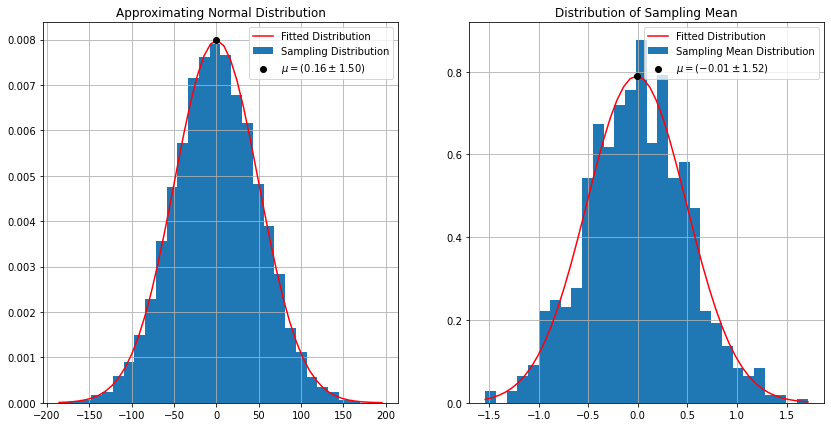

In [331]:
plot_distribution(np.random.normal,[0,50],guassian,
                  lambda mu,sigma:[mu,sigma],10000,1000,30,std=3)

## 2. Uniform Distribution $\mathcal{U}\left(a,b\right)$

1. Support: $\left[a,b\right]$
2. Parameters: Min $a$, Max $b$
3. PDF: $\frac{1}{b-a}$
4. Mean: $\frac{a+b}{2}$
5. Variance: $\frac{(b-a)^2}{12}$

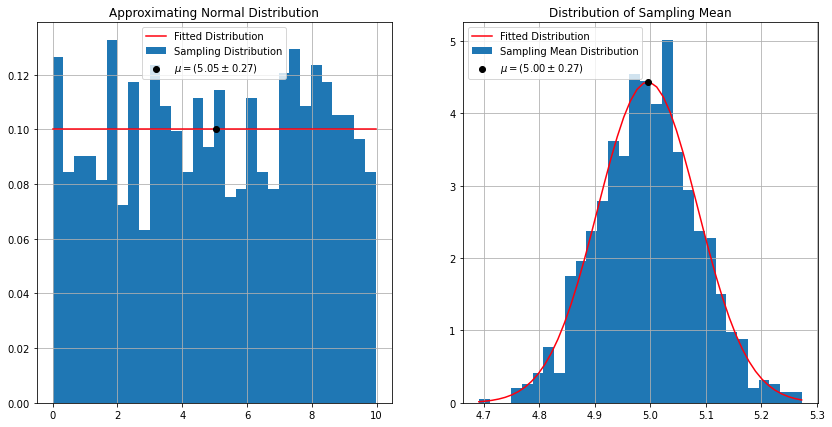

In [342]:
plot_distribution(np.random.uniform,[0,10],lambda x,a,b:np.ones(x.shape)/(b-a),
                  lambda mu,sigma:[mu-np.sqrt(3)*sigma,mu+np.sqrt(3)*sigma],n=1000,m=1000,k=30,std=3)

## 3. Exponential Distribution $\mathcal{E}\left(\lambda\right)$
Used to model processes with no memory, such as nulear decay
1. Support $\mathbb{R}_+$
2. Parameters: decay rate $\lambda$
3. PDF: $\lambda e^{-\lambda x}$
4. Mean: $\frac{1}{\lambda}$
5. Variance: $\frac{1}{\lambda^2}$

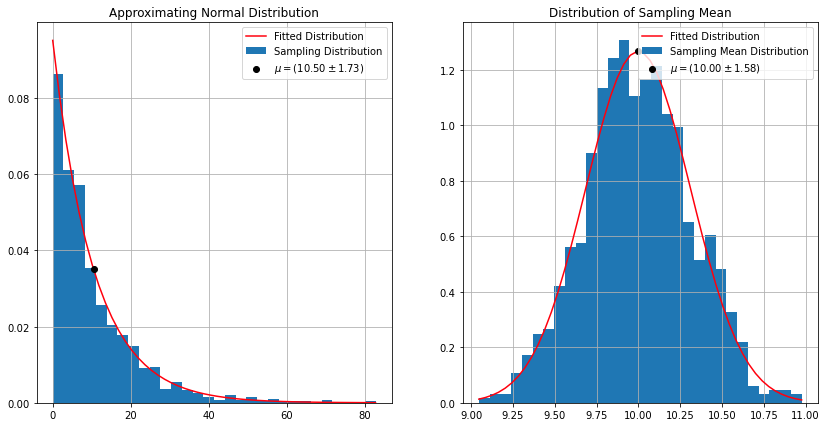

In [343]:
plot_distribution(np.random.exponential,[10],lambda x,s:s*np.heaviside(x,0)*np.exp(-s*x),
                  lambda mu,sigma:[1/mu],1000,1000,30,std=5)

## 4. Gamma Distribution $\mathcal{G}\left(k,\theta\right)$
Used to model a sum of processes with no memory
1. Support: $\mathbb{R}_+$
2. Parameters: Shape $k$, Scale $\theta$
3. PDF: $\frac{x^{k-1}}{\theta^k \Gamma(k)}e^{-\frac{x}{\theta}}$
4. Mean: $k\theta$
5. Variance: $k\theta^2$

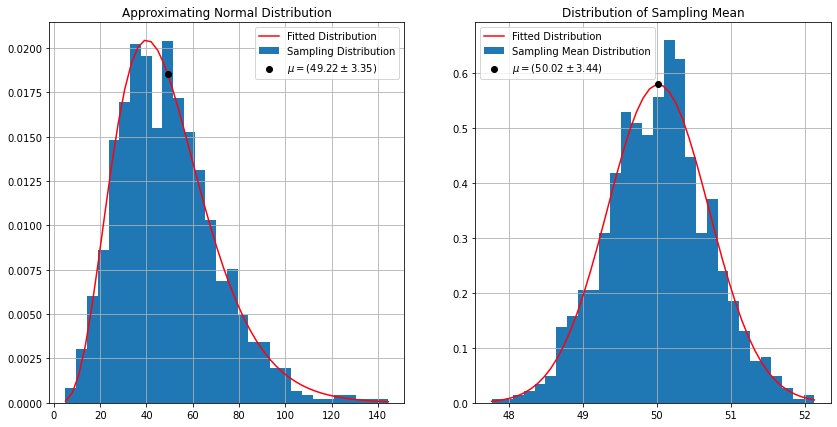

In [352]:
from scipy.special import gamma
plot_distribution(np.random.gamma,[5,10],
                  lambda x,k,theta:np.heaviside(x,0)*np.float_power(x,k-1)*np.exp(-x/theta)/(np.float_power(theta,k)*gamma(k)),
                  lambda mu,sigma:[(mu/sigma)**2,sigma**2/mu],1000,1000,30,std=5)

## 5. Logistic Distribution $\mathcal{L}\left(\mu,s\right)$
This distribution is used to model Logistic Regression
1. Support: $\mathbb{R}$
2. Parameters: mean $\mu$, scale $s>0$
3. PDF: $\frac{e^{-\frac{x-\mu}{s}}}{s\left(1+e^{-\frac{x-\mu}{s}}\right)^2}$
4. Mean: $\mu$
5. Variance $\frac{\pi^2}{3}s$


5.162418353690827 9.85985953178651


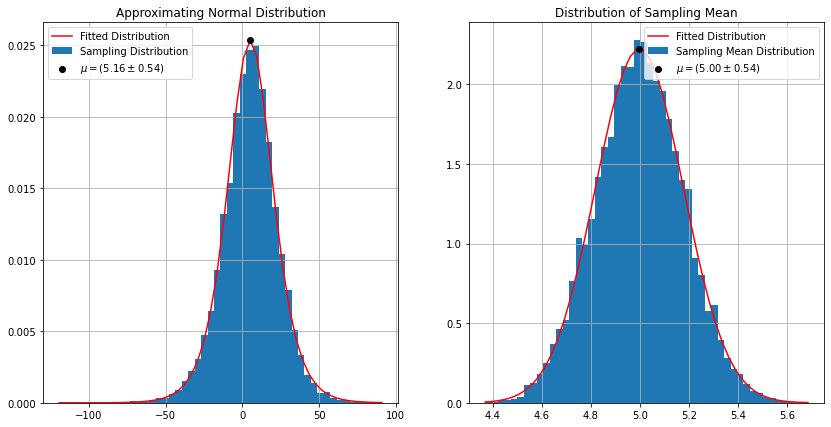

In [324]:
from scipy.special import gamma
plot_distribution(np.random.logistic,[5,10],
                  lambda x,mu,s:np.exp(-(x-mu)/s)/(s*(1+np.exp(-(x-mu)/s))**2),
                  lambda mu,sigma:[mu,sigma*np.sqrt(3)/np.pi],10000,10000,50,std=3)

# IV. Calculating Mean & Variance

## 1. Normal Distribution

### 1.1 Proving it is a distribution
Let $I=\int_{\mathbb{R}}e^{-x^2}dx$
We have $I >0$
$$
\begin{align}
X \sim \mathcal{N}\left(\mu,\sigma\right) \\
I^2 & = \left(\int_{\mathbb{R}}e^{-x^2}dx\right)\cdot\left(\int_{\mathbb{R}}e^{-y^2}dy\right) \\
&= \int_{\mathbb{R}}\int_{\mathbb{R}}e^{-\left(x^2+y^2\right)} dxdy \\
&= \iint_{\mathbb{R^2}}e^{-\lVert u \rVert^2} du \\
&= \iint_{\left[0,2\pi\right]\times \mathbb{R_+}}re^{-r^2} d\theta dr \\
&= \left(\int_0^{2\pi} d\theta\right) \cdot \left( \int_0^{+\infty} r e^{-r^2} dr \right) \\
&= 2\pi \Bigl[\frac{-1}{2}e^{r^2}\Bigr]_0^{+\infty} \\
&= \pi \\
\implies I &=\sqrt{\pi}  \\
\\
\frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx &=\frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}} \sqrt{2}\sigma  e^{-u^2} du & \begin{cases} u=\frac{x-\mu}{\sqrt{2}\sigma}\\ \sqrt{2}\sigma du=dx \end{cases} \\
&= \frac{1}{\sqrt{\pi}}\int_{\mathbb{R}} e^{-u^2} du \\
&= \frac{I}{\sqrt{\pi}} \\
&= 1
\end{align}$$

### 1.2 Expected Value

$$
\begin{align}
\mathbb{E}\left[X-\mu\right] &=\frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}(x-\mu)e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx\\
&= \frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}ue^{-\frac{u^2}{2\sigma^2}} du &\begin{cases} u=x-\mu \\ du=dx \end{cases} \\
&= 0 & \text{ because the integrand is odd} \\
\implies \mathbb{E}\left[X\right] &=\mu \\
\end{align}
$$

### 1.3 Variance

$$
\begin{align}
\mathbb{V}\left[X\right] &= \frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}(x-\mu)^2e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx\\
&= \frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}\sigma^2 u^2e^{-\frac{u^2}{2}} \sigma du & \begin{cases} u=\frac{x-\mu}{\sigma} \\ \sigma du=dx \end{cases} \\
&=  \frac{\sigma^2}{\sqrt{2\pi}}\int_{\mathbb{R}} u^2e^{-\frac{u^2}{2}} \sigma du \\
&= \frac{\sigma^2}{\sqrt{2\pi}}\left(\Bigl[-ue^{-u^2} \Bigr]_{-\infty}^{+\infty} + \int_{\mathbb{R}} e^{-\frac{u^2}{2}} \sigma du \right) \\
&= \frac{\sigma^2}{\sqrt{2\pi}}\int_{\mathbb{R}} e^{-\frac{u^2}{2}} \sigma du \\
&= \frac{\sigma^2}{\sqrt{\pi}}\int_{\mathbb{R}} e^{-v^2} \sigma dv & \begin{cases} v=\frac{u}{\sqrt{2}} \\ \sigma \sqrt{2}dv=du \end{cases} \\
&= \frac{\sigma^2}{\sqrt{\pi}} I \\
&= \sigma^2
\end{align} 
$$

## 2. Uniform Distribution

### 2.1 Expected Value
$$ \mathbb{E}\left[X\right] = \frac{1}{b-a}\int_a^b xdx = \frac{b^2-a^2}{2(b-a)} = \frac{a+b}{2}  $$
### 2.2 Variance
$$
\mathbb{E}\left[X^2\right] = \frac{1}{b-a}\int_a^b x^2dx = \frac{b^3-a^3}{3(b-a)} = \frac{a^2+ab+b^2}{3} \\
\mathbb{V}\left[X\right] = \mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2 =  \frac{a^2+ab+b^2}{3}-\frac{a^2+2ab+b^2}{4}= \frac{a^2-2ab+b^2}{12}=\frac{(b-a)^2}{12}
$$

## 2.3 $a,b$ as functions of $\mu$ and $\sigma$
We have the following identities
$$
\begin{cases}
a &=\mu-\sqrt{3}\sigma \\
b &=\mu+\sqrt{3}\sigma
\end{cases}
$$

## 3. Exponential Distribution

### 3.1 Expected Value
$$ \begin{align}
\mathbb{E}\left[X\right] &= \int_0^{+\infty}\lambda x e^{-\lambda x}dx \\
&= \frac{1}{\lambda}\int_0^{+\infty}ue^{-u}du & \begin{cases} u=\lambda x \\ \frac{du}{\lambda}=dx \end{cases}\\ 
&= \frac{\Gamma(2)}{\lambda} \\
&= \frac{1}{\lambda}
\end{align}
$$

### 3.2 Variance
$$ \begin{align}
\mathbb{E}\left[X^2\right] &= \int_0^{+\infty}\lambda x^2 e^{-\lambda x}dx \\
&= \frac{1}{\lambda^2}\int_0^{+\infty}u^2e^{-u}du & \begin{cases} u=\lambda x \\ \frac{du}{\lambda}=dx \end{cases}\\ 
&= \frac{\Gamma(3)}{\lambda^2} \\
&= \frac{2}{\lambda^2}
\mathbb{V}\left[X\right] &= \mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2 \\
&= \frac{1}{\lambda^2}
\end{align}
$$

## 3.3 $\lambda$ as a function of $\mu$
We have the following identity
$$\lambda=\frac{1}{\mu}
$$

## 4. Gamma Distribution
### 4.1 Proving it is a Distribution
$$ \begin{align}
\frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}x^{k-1}e^{-\frac{x}{\theta}} dx 
&= \frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}\theta^{k-1}u^{k-1} e^{-u} \theta du & \begin{cases} u=\frac{x}{\theta} \\ \theta du =x \end{cases} \\
&= \frac{1}{\Gamma(k)} \int_{0}^{+\infty}u^{k-1} e^{-u} \\
&= \frac{1}{\Gamma(k)} \cdot \Gamma(k) \\
&= 1
\end{align}
$$

### 4.2 Expected Value
$$ \begin{align}
\mathbb{E}\left[X\right] &= 
\frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}x^{k}e^{-\frac{x}{\theta}} dx  \\
&= \frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}\theta^{k}u^{k} e^{-u} \theta du & \begin{cases} u=\frac{x}{\theta} \\ \theta du =x \end{cases} \\
&= \frac{\theta}{\Gamma(k)}\int_{0}^{+\infty}u^{k} e^{-u} \theta du \\
&= \frac{\theta}{\Gamma(k)}\cdot \Gamma(k+1) \\
&= k\theta
\end{align}
$$

### 4.3 Variance
$$ \begin{align}
\mathbb{E}\left[X^2\right] &= 
\frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}x^{k+1}e^{-\frac{x}{\theta}} dx  \\
&= \frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}\theta^{k+1}u^{k+1} e^{-u} \theta du & \begin{cases} u=\frac{x}{\theta} \\ \theta du =x \end{cases} \\
&= \frac{\theta^2}{\Gamma(k)}\int_{0}^{+\infty}u^{k+1} e^{-u} \theta du \\
&= \frac{\theta}{\Gamma(k)}\cdot \Gamma(k+2) \\
&= k(k+1)\theta \\
\mathbb{V}\left[X\right] &= \mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2 \\
&= k(k+1)\theta^2-k^2\theta^2 \\
&= k\theta^2
\end{align}
$$

## 4.3 $k,\theta$ as functions of $\mu$ and $\sigma$
We have the following identities
$$
\begin{cases}
k &=\frac{\mu^2}{\sigma^2} \\
\theta &=\frac{\sigma^2}{\mu}
\end{cases}
$$

## 5. Logistic Distribution
### 5.1 Proving it is a Distribution
$$ \begin{align}
\frac{1}{s}\int_{\mathbb{R}}\frac{e^{-\frac{x-\mu}{s}}}{\left(1+e^{-\frac{x-\mu}{s}}\right)^2}dx 
&= \frac{1}{s}\int_{\mathbb{R}}s \frac{e^{-u}}{\left(1+e^{-u}\right)^2}du & \begin{cases} u=\frac{x-\mu}{s}  \\ sdu =dx \end{cases} \\
&= \Bigl[\frac{1}{1+e^{-u}}\Bigr]_{-\infty}^{+\infty} \\
&= 1
\end{align}
$$

### 5.2 Expected Value
$$ \begin{align}
\mathbb{E}\left[X-\mu\right] &= \frac{1}{s}\int_{\mathbb{R}}\frac{(x-\mu)e^{-\frac{x-\mu}{s}}}{\left(1+e^{-\frac{x-\mu}{s}}\right)^2}dx \\
&= s \int_{\mathbb{R}}u\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du & \begin{cases} u=\frac{x-\mu}{s}  \\ sdu =dx \end{cases} \\
&= - s \int_{\mathbb{R}}v\frac{e^{v}}{\left(1+e^{v}\right)^2}dv & \begin{cases} v=-u  \\ -dv =du \end{cases} \\
&= - s \int_{\mathbb{R}}v\frac{e^{-v}}{e^{-2v}\left(1+e^{v}\right)^2}dv \\
&= - s \int_{\mathbb{R}}v\frac{e^{-v}}{\left(1+e^{-v}\right)^2}dv \\
&= -\mathbb{E}\left[X-\mu\right]\\
\implies \mathbb{E}\left[X-\mu\right] &= 0 \\
\implies \mathbb{E}\left[X\right] &= \mu
\end{align}
$$

### 5.3 Variance
$$ \begin{align}
\mathbb{V}\left[X\right] &= 
\frac{1}{s}\int_{\mathbb{R}}\frac{(x-\mu)^2e^{-\frac{x-\mu}{s}}}{\left(1+e^{-\frac{x-\mu}{s}}\right)^2}dx \\
&= s^2 \int_{\mathbb{R}}u^2\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du & \begin{cases} u=\frac{x-\mu}{s}  \\ sdu =dx \end{cases} \\
&= 2s^2 \int_{0}^{+\infty}u^2\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du
\end{align}
$$
Let $f_n=\sum{n\in\mathbb{N}} (-1)^nx^n,f = \frac{1}{x+1}$ 
We know that for $f_n$ converges point-wise to $f$ on $[0,1[$
$$ \begin{align}
\frac{1}{x+1} &= \sum_{n\in\mathbb{N}} (-1)^nx^n \\
\implies \frac{1}{(x+1)^2} &= -f'(x) \\
&= - \sum_{n\in\mathbb{N}^*} n(-1)^nx^{n-1}\\
&=  \sum_{n\in\mathbb{N}} (n+1)(-1)^nx^{n} & \forall x\in[0,1[ \\
\implies \frac{1}{(e^{-u}+1)^2} &= \sum_{n\in\mathbb{N}} (n+1)(-1)^ne^{-nu} & \forall u\in\mathbb{R}_+^* \\
\implies \frac{u^2e^{-u}}{(e^{-u}+1)^2} &= \sum_{n\in\mathbb{N}} (n+1)(-1)^nu^2e^{-(n+1)u} & \forall u\in\mathbb{R}_+^*
\end{align}
$$
- let $h_n=u\rightarrow\sum_{k=0}^n (k+1)(-1)^ku^2e^{-(k+1)u}, h=u\rightarrow \frac{u^2e^{-u}}{(e^{-u}+1)^2}$
- We admit that $\left(h_n\right)_{n\in\mathbb{N}}$ converges to $h$ in the norm of $\mathscr{L}^1$ (To Prove)
We have then: 
$$\begin{align}
\int_{\mathbb{R}_+}h du &= \sum_{n\in\mathbb{N}} \int_{\mathbb{R}_+} h_n du \\
\implies \int_{0}^{+\infty}u^2\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du &= \sum_{n\in\mathbb{N}} \int_{\mathbb{R}_+} (n+1)(-1)^nu^2e^{-(n+1)u} du \\
&= \sum_{n\in\mathbb{N}} (n+1) \int_{\mathbb{R}_+} \frac{(-1)^n}{(n+1)^3}v^2e^{-v} dv \begin{cases} v=(n+1)u \\ \frac{dv}{n+1}=du  \end{cases}\\
&= \sum_{n\in\mathbb{N}} \frac{(-1)^n}{(n+1)^2} \int_{\mathbb{R}_+} v^2e^{-v} dv \\
&= \sum_{n\in\mathbb{N}} \frac{(-1)^n}{(n+1)^2} \Gamma(3) \\
&= \sum_{n\in\mathbb{N}} 2\frac{(-1)^n}{(n+1)^2} \\
&= -2\sum_{n\in\mathbb{N}*} \frac{(-1)^n}{n^2} \\
&= -2\left(\frac{1}{4}\sum_{n\in\mathbb{N}*} \frac{1}{n^2}-\sum_{n\in\mathbb{N}} \frac{1}{(2n+1)^2}\right) \\
&= -2\left(\frac{1}{2}\sum_{n\in\mathbb{N}*} \frac{1}{n^2}-\frac{1}{4}\sum_{n\in\mathbb{N}*} \frac{1}{n^2}-\sum_{n\in\mathbb{N}} \frac{1}{(2n+1)^2}\right) \\
&= -2\left(\frac{1}{2}\sum_{n\in\mathbb{N}*} \frac{1}{n^2}-\sum_{n\in\mathbb{N}^*} \frac{1}{n^2}\right) \\
&=\sum_{n\in\mathbb{N}*} \frac{1}{n^2} \\
&= \frac{\pi^2}{6}
\end{align}
$$
- Conclusion
$$ \mathbb{V}\left[X\right]= 2s^2\int_{0}^{+\infty}u^2\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du = \frac{\pi^2}{3}s^2 $$

## 5.4 $s$ as a functions of $\mu$ and $s$
We have the following identity:
$$
s = \frac{\sqrt{3}}{\pi}\sigma
$$

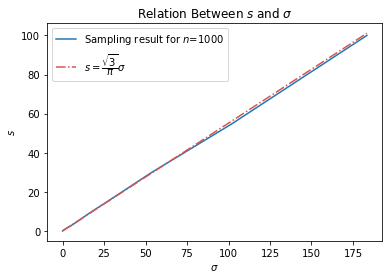

In [45]:
fig,ax = plt.subplots()
S = np.logspace(-3,2,20)
Sig=np.zeros(20)
n=1000
for i,s in enumerate(S):
    Sig[i]=np.random.logistic(0,s,n).std()
ax.plot(Sig,S,label="Sampling result for $n$={}".format(n))
ax.plot([0,Sig[-1]],[0,np.sqrt(3)*Sig[-1]/np.pi],color="xkcd:pale red",label=r"$s=\dfrac{\sqrt{3}}{\pi}\sigma$",ls="dashdot")
ax.set_title("Relation Between $s$ and $\sigma$")
ax.set_xlabel("$\sigma$")
ax.set_ylabel("$s$")
ax.legend()

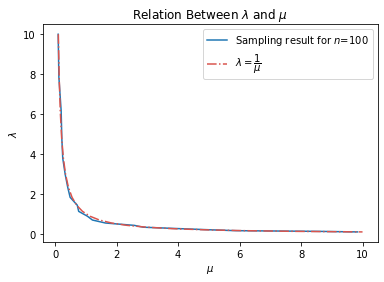

In [51]:
fig,ax = plt.subplots()
P=np.logspace(-1,1,20)
L = P
Expected=np.zeros(20)
n=100
for i,l in enumerate(L):
    Expected[i]=np.random.exponential(1/l,n).mean()
ax.plot(Expected,L,label="Sampling result for $n$={}".format(n))
ax.plot(P,1/P,color="xkcd:pale red",label=r"$\lambda=\dfrac{1}{\mu}$",ls="dashdot")
ax.set_title("Relation Between $\lambda$ and $\mu$")
ax.set_xlabel("$\mu$")
ax.set_ylabel("$\lambda$")
ax.legend()

In [195]:
((np.random.normal(0,50,[2000,1000]).var(axis=0)-50**2)**2).mean()

6340.0885306083355

In [207]:
def sampling_variance_variance(X):
    n=X.shape[0]
    k=((X-X.mean())**4).mean()
    sig=X.std()
    return (k-(sig**4)*(n-3)/(n-1))/n

def sampling_mean_variance(X):
    n=X.shape[0]
    sig=X.std()
    return sig**2/n
sampling_variance_variance(np.random.normal(0,50,2000))

1.2584541610598015

In [211]:
np.random.normal(0,50,2000).var()

2463.1626754905974

In [201]:
2*50**4/1999

6253.126563281641

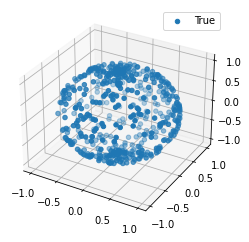

In [251]:
n=500
#ax = fig.add_subplot(1,1,1,projection= "3d")
ax=plt.subplot(111,projection="3d")
A1=np.random.uniform(0,2*np.pi,n)
A2=np.random.uniform(0,np.pi,n)
ax.scatter(np.cos(A1)*np.sin(A2),np.sin(A1)*np.sin(A2),np.cos(A2),label="True")
ax.legend()

Object `ax.get_canvas` not found.
